In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vedio-test/test_vedio.mp4
/kaggle/input/datasset-cv/Student_img.jpg
/kaggle/input/datasset-cv/images_test.jpg
/kaggle/input/vedio-testing/videoplayback.mp4


In [2]:
!nvidia-smi

Tue May 13 11:38:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 90.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 45.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 90.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 65.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 113.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 179.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.939 [nvidia-nvjitlink-cu12]
  Attempting uninstall: nvidia-curand-cu12━━━━━━ 0/

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6362.0/8062.4 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import  Image

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fbJGZWRXE6vcOBjIDOzT")
project = rf.workspace("fai-pplp3").project("exam-monitoring-system-v2-hsixr")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 113.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 135.4 MB/s eta 0:00:00
  Attempting uninstall: idna0m╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/6 [pillow-heif]
    Found existing installation: idna 3.10━━━━━━━━━━━━━━━━━━━━ 2/6 [pillow-heif]
    Uninstalling idna-3.10:━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/6 [pillow-heif]
      Successfully uninstalled idna-3.10━━━━━━━━━━━━━━━━━━━━━━ 2/6 [pillow-heif]
  Attempting uninstall: opencv-python-headlessm━━━━━━━━━━━━━━━━━━━ 3/6 [idna]if]
    Found existing installation: opencv-python-headless 4.11.0.86m 3/6 [idna]
    Uninstalling opencv-python-headless-4.11.0.86:━━━━━━━━━━━━ 3/6 [idna]
      Successfully uninstalled opencv-python-headless-4.11.0.86━━━ 4/6 [opencv-python-headless]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [roboflow]5/6 [roboflow]thon-headless]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.


Extracting Dataset Version Zip to Exam-Monitoring-System-v2-1 in yolov11:: 100%|██████████| 5520/5520 [00:00<00:00, 7966.87it/s]


In [8]:
dataset.location

'/kaggle/working/Exam-Monitoring-System-v2-1'

In [9]:
!yolo task=detect mode=train  data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640

100%|███████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 106MB/s]
Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Exam-Monitoring-System-v2-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=No

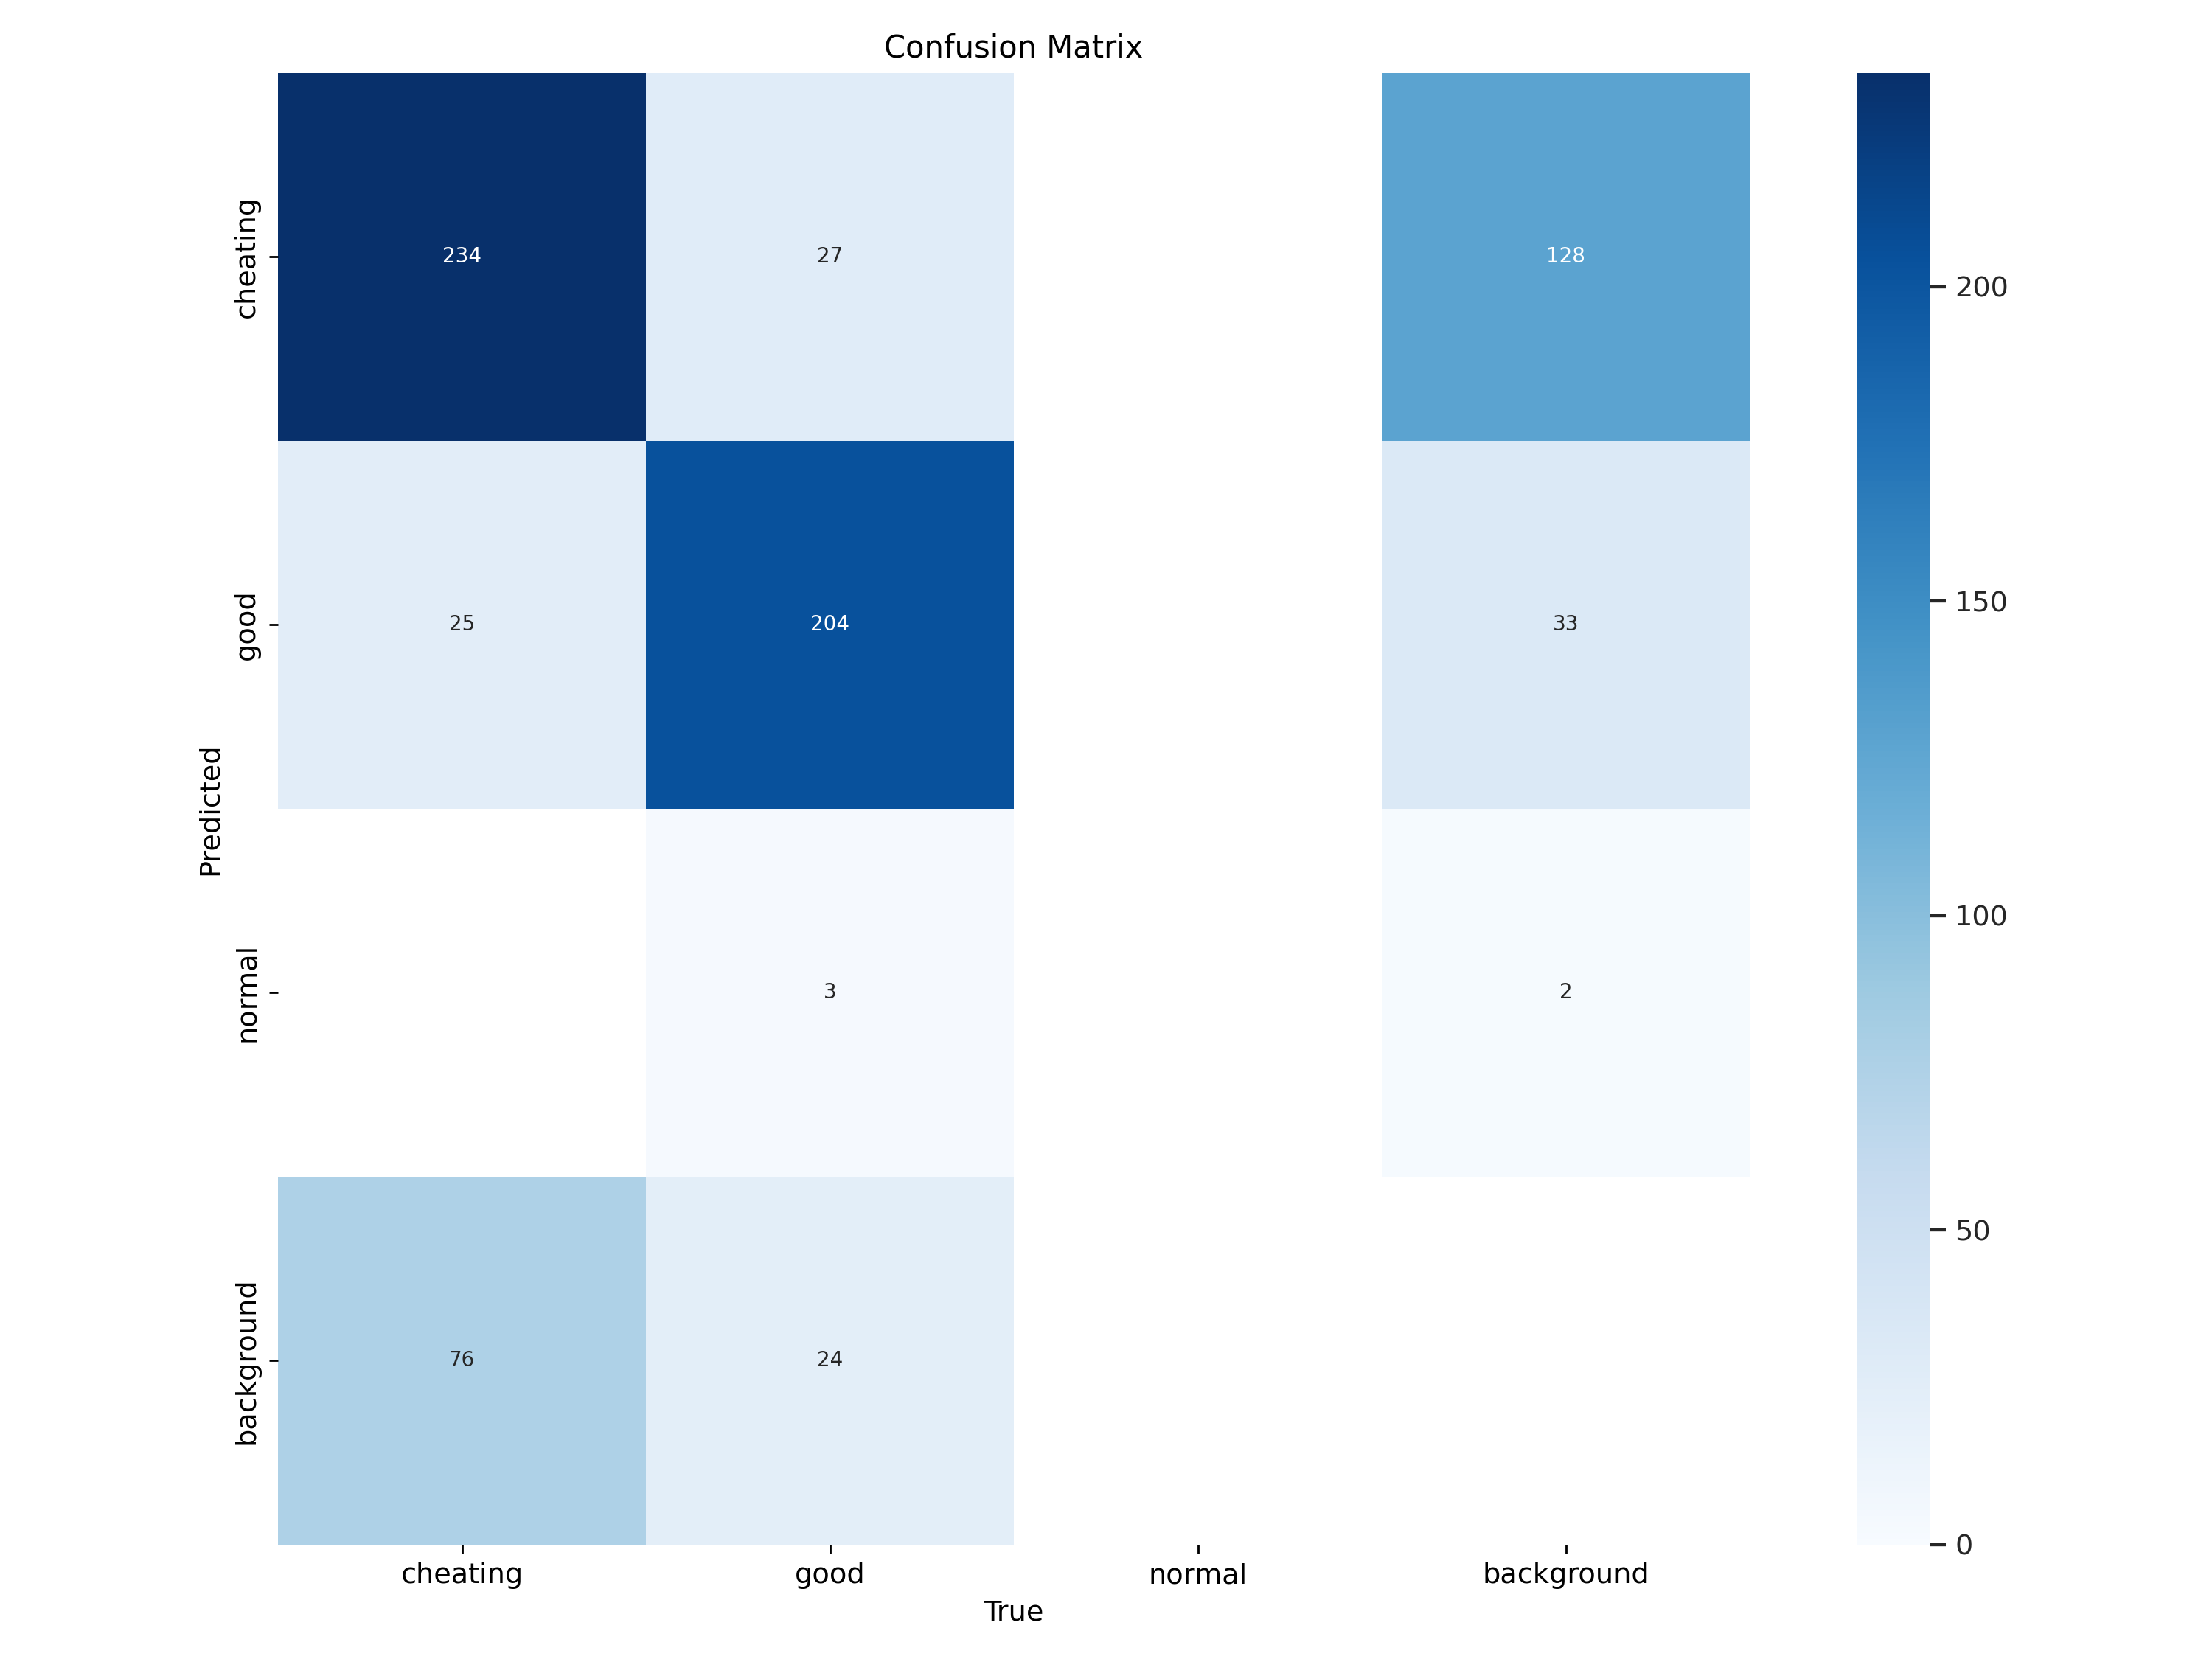

In [10]:
Image('runs/detect/train/confusion_matrix.png',width=800)

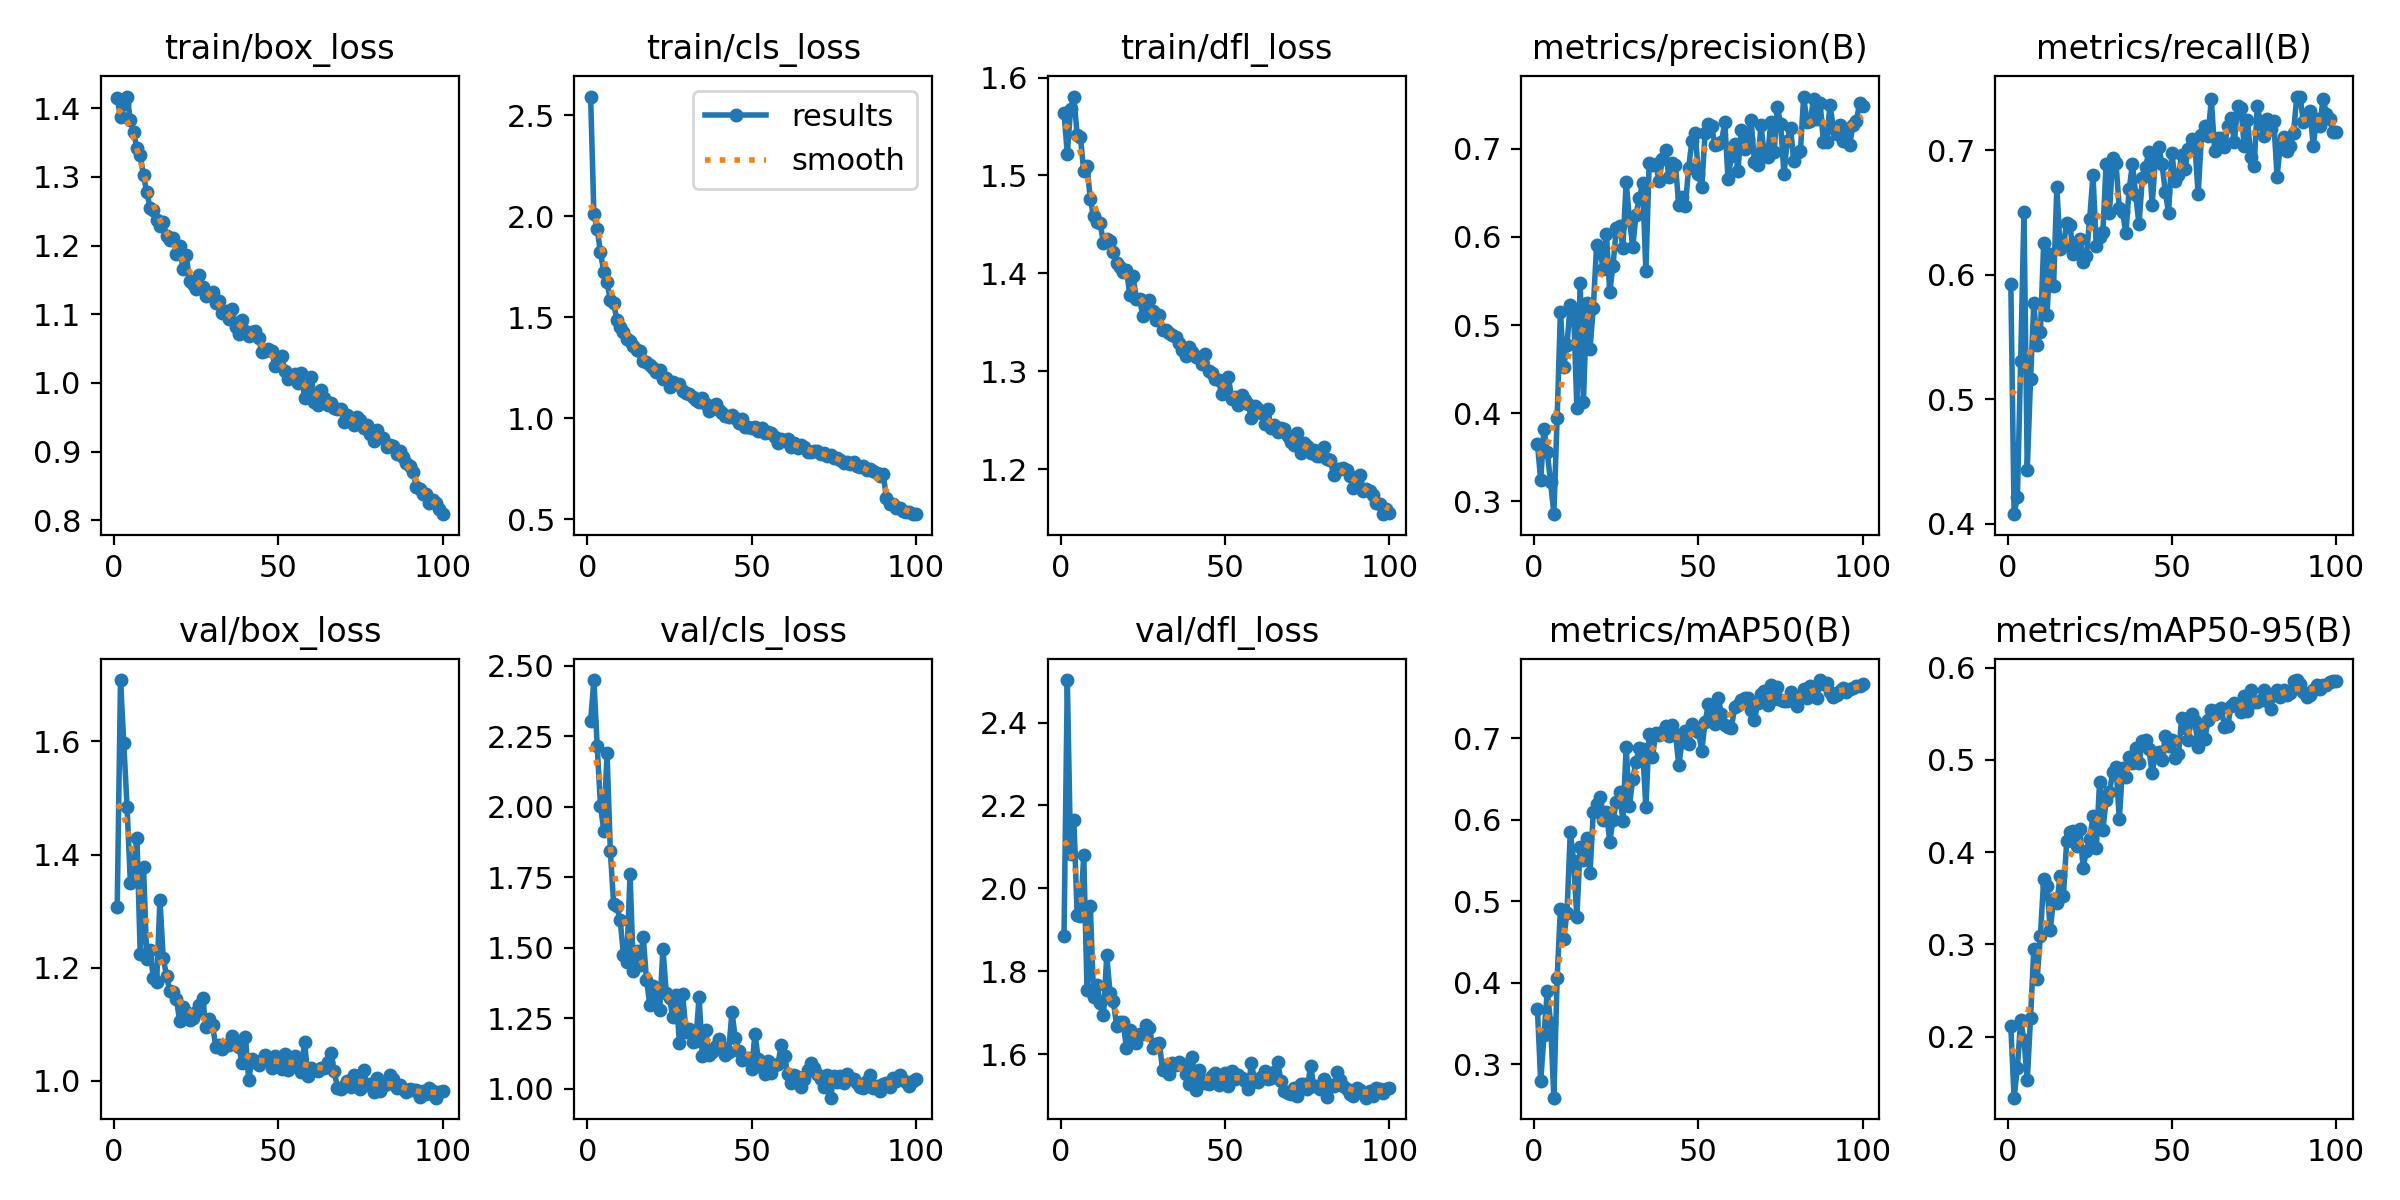

In [11]:
Image('runs/detect/train/results.png')

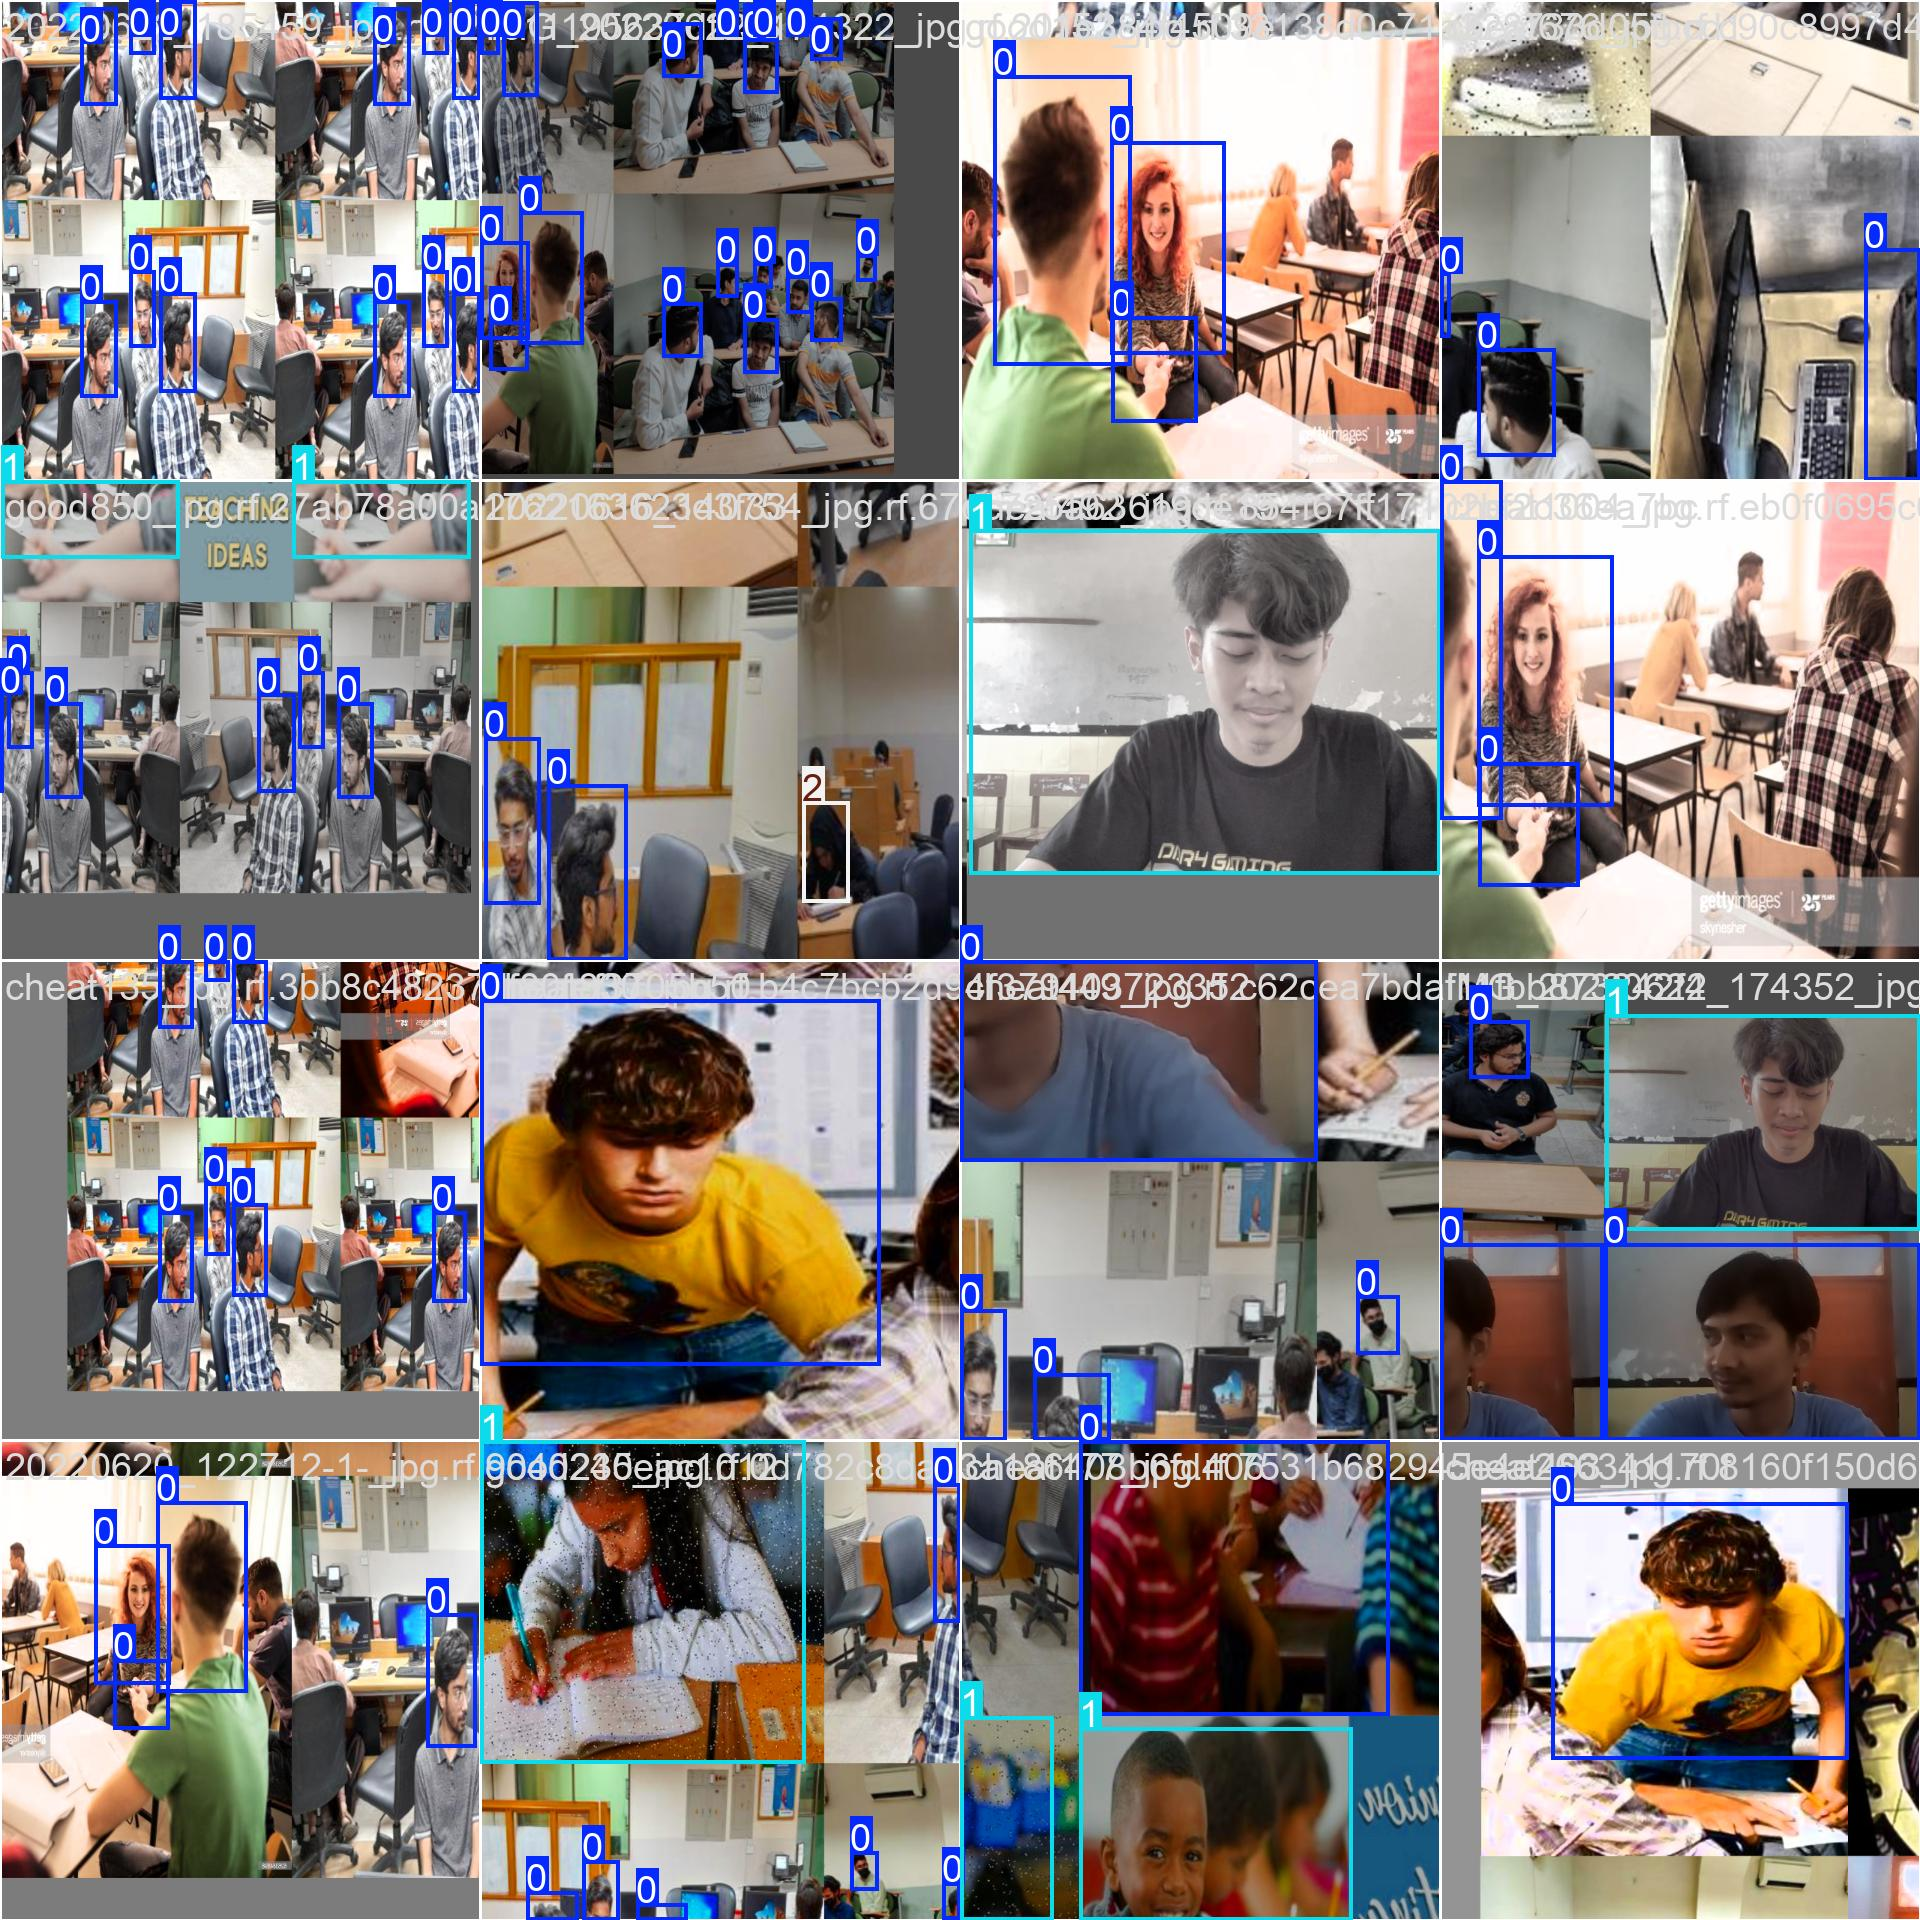

In [12]:
Image('runs/detect/train/train_batch0.jpg')

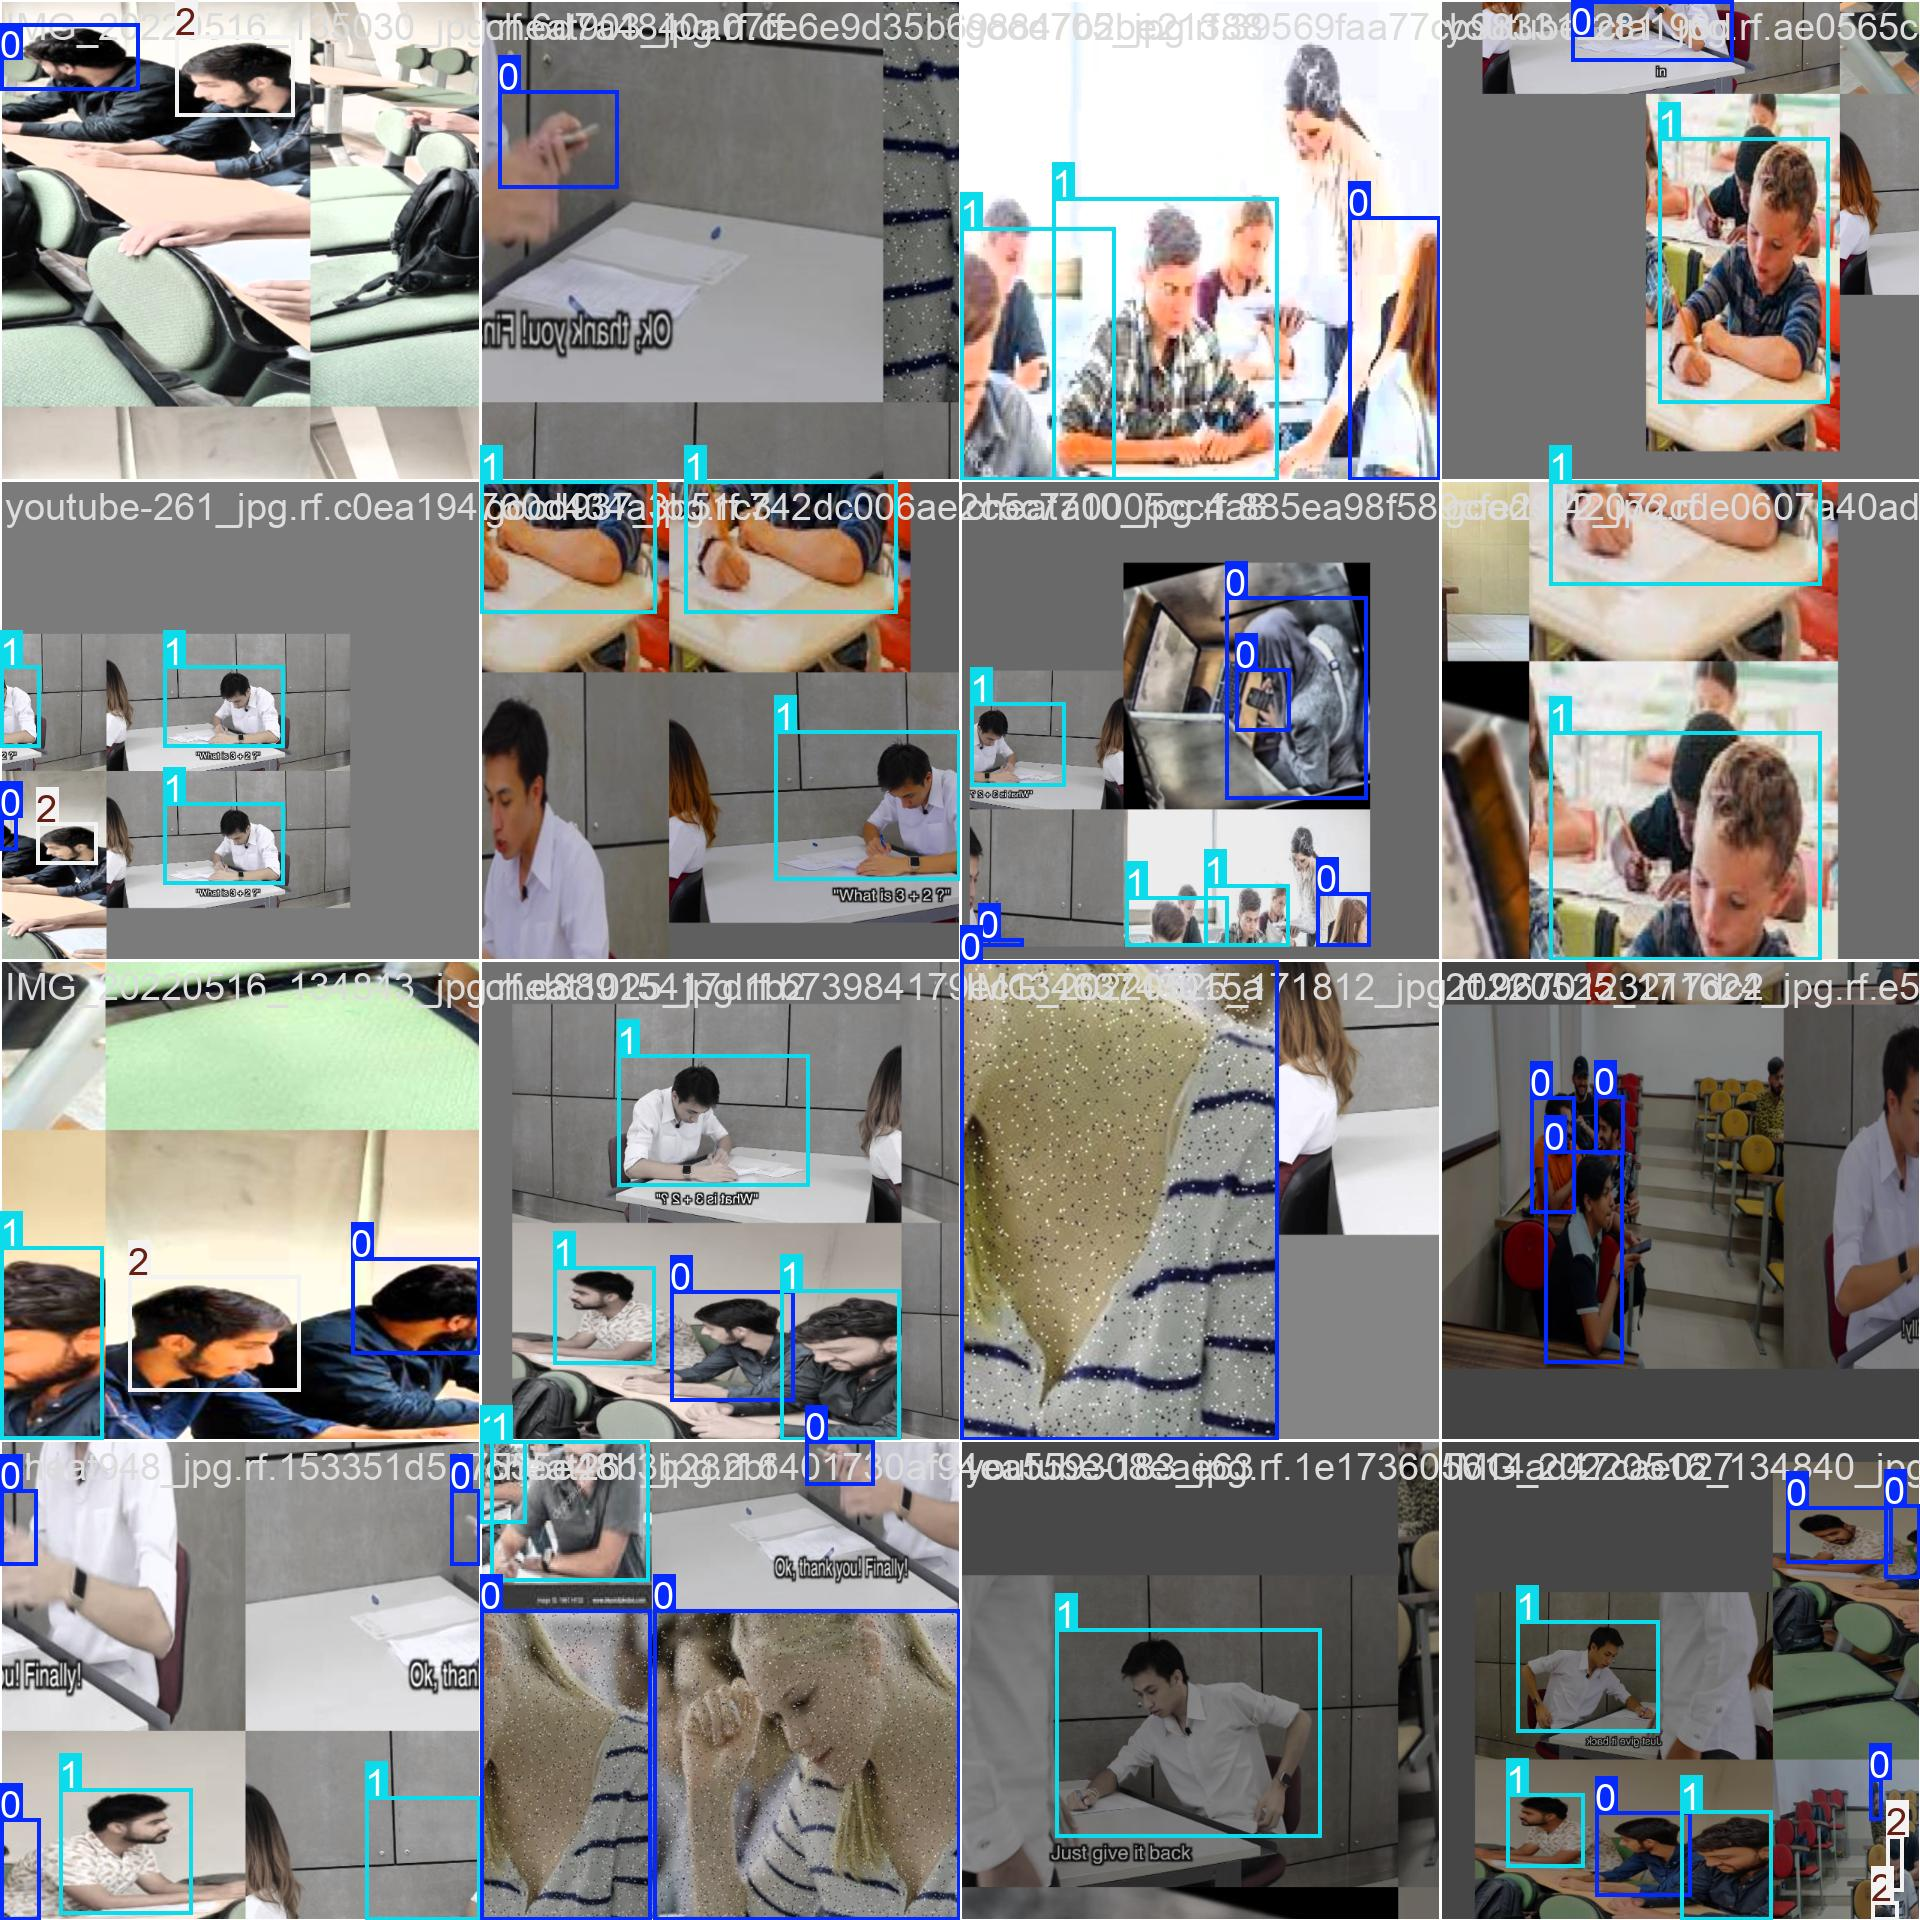

In [13]:
Image('runs/detect/train/train_batch1.jpg')

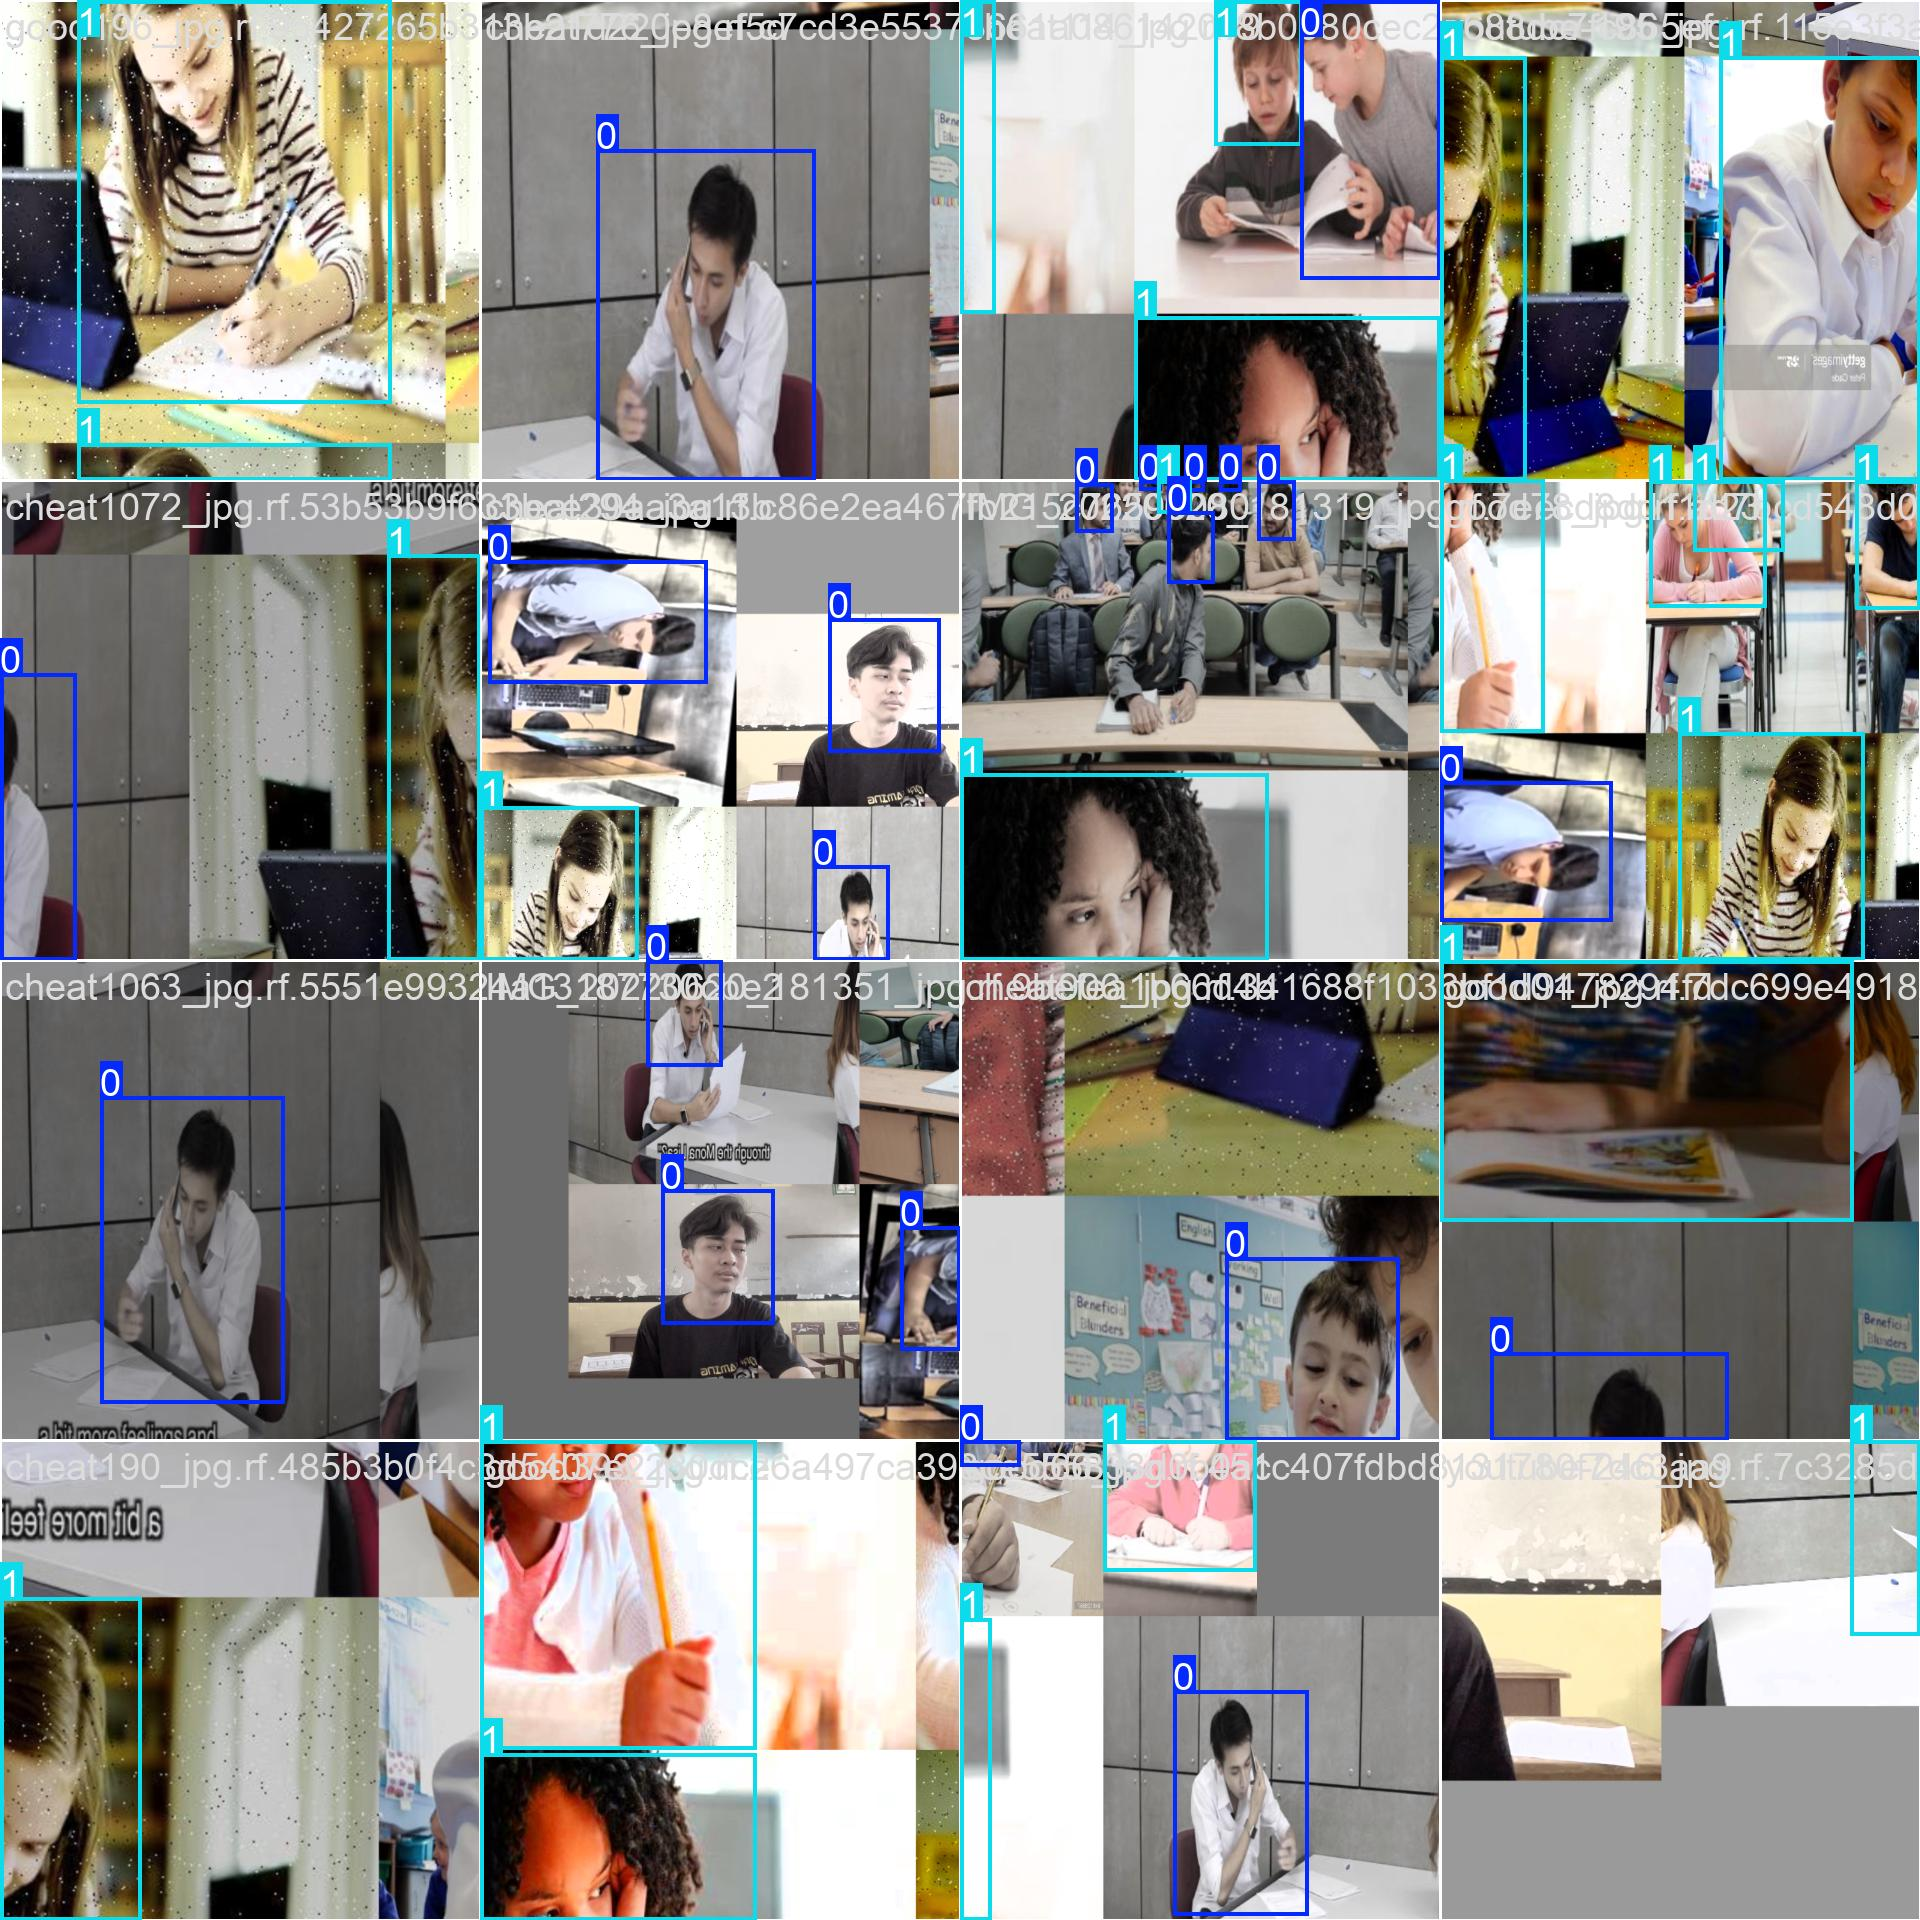

In [14]:
Image('runs/detect/train/train_batch2.jpg')

In [15]:
!yolo task=detect mode=val model='runs/detect/train/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1684.3±1007.8 MB/s, size: 65.3 KB)
val: Scanning /kaggle/working/Exam-Monitoring-System-v2-1/valid/labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        457        593      0.708      0.746      0.767      0.587
              cheating        271        335      0.611       0.69      0.682      0.503
                  good        219        258      0.805      0.802      0.853      0.671
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
Speed: 0.5ms preprocess, 3.0ms inference

In [16]:
!yolo task=detect mode=predict model='runs/detect/train/weights/best.pt' conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/214 /kaggle/working/Exam-Monitoring-System-v2-1/test/images/20220622_185436_jpg.rf.c565c0c4ee4d2c508693d6c3f8d4e326.jpg: 640x640 3 cheatings, 11.8ms
image 2/214 /kaggle/working/Exam-Monitoring-System-v2-1/test/images/20220622_185441_jpg.rf.db1dc57fddd5aace447f84e522c74895.jpg: 640x640 4 cheatings, 8.4ms
image 3/214 /kaggle/working/Exam-Monitoring-System-v2-1/test/images/20220622_185519_jpg.rf.a99dd9ad090903e1bd2881d288c9926a.jpg: 640x640 3 cheatings, 1 normal, 8.0ms
image 4/214 /kaggle/working/Exam-Monitoring-System-v2-1/test/images/cheat06_jpg.rf.ab3514183b8effde0488cbe0b41735a0.jpg: 640x640 1 cheating, 1 good, 8.0ms
image 5/214 /kaggle/working/Exam-Monitoring-System-v2-1/test/images/cheat08_jpg.rf.7284f3df78b5787da0dd1525b532114e.jpg: 640x640 2 cheatings, 8.7ms
image 6/214 /kaggle/working/Exam-Monito

In [17]:
import glob
import os
from IPython.display import Image, display

# Get the most recent subfolder inside /content/runs/detect/predict2
latest_folder = max(glob.glob('runs/detect/predict/*'), key=os.path.getmtime)

# Display up to 3 images (excluding the first one if you want)
for img_path in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(Image(filename=img_path, width=600))
    print("\n")


import glob
import os
from IPython.display import Image, display

# Step 1: Find the latest folder
latest_folder = max(glob.glob('runs/detect/predict/*'), key=os.path.getmtime)
print("✅ Latest folder found:", latest_folder)

# Step 2: Get all .jpg image paths in that folder
image_paths = glob.glob(f'{latest_folder}/*.jpg')
print(f"✅ Found {len(image_paths)} image(s):", image_paths)

# Step 3: Display first 3 images (or fewer if not enough)
if image_paths:
    for img_path in image_paths[:3]:
        print("📷 Displaying:", img_path)
        display(Image(filename=img_path, width=600))
else:
    print("❌ No .jpg images found in the folder.")


In [18]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" conf=0.25 source="/kaggle/input/datasset-cv/Student_img.jpg" save=True

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /kaggle/input/datasset-cv/Student_img.jpg: 480x640 2 goods, 42.0ms
Speed: 6.7ms preprocess, 42.0ms inference, 161.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [19]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" conf=0.25 source="/kaggle/input/datasset-cv/images_test.jpg" save=True

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /kaggle/input/datasset-cv/images_test.jpg: 448x640 (no detections), 41.4ms
Speed: 6.5ms preprocess, 41.4ms inference, 41.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [20]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" conf=0.25 source="/kaggle/input/datasset-cv/images_test.jpg" save=True

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /kaggle/input/datasset-cv/images_test.jpg: 448x640 (no detections), 41.5ms
Speed: 7.1ms preprocess, 41.5ms inference, 34.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [25]:
!yolo task=detect mode=predict model='runs/detect/train/weights/best.pt' conf=0.25 source='/kaggle/input/vedio-test/test_vedio.mp4' save=True


Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/97) /kaggle/input/vedio-test/test_vedio.mp4: 384x640 7 cheatings, 1 good, 59.1ms
video 1/1 (frame 2/97) /kaggle/input/vedio-test/test_vedio.mp4: 384x640 7 cheatings, 1 good, 9.4ms
video 1/1 (frame 3/97) /kaggle/input/vedio-test/test_vedio.mp4: 384x640 7 cheatings, 1 good, 9.0ms
video 1/1 (frame 4/97) /kaggle/input/vedio-test/test_vedio.mp4: 384x640 7 cheatings, 1 good, 8.6ms
video 1/1 (frame 5/97) /kaggle/input/vedio-test/test_vedio.mp4: 384x640 7 cheatings, 1 good, 9.0ms
video 1/1 (frame 6/97) /kaggle/input/vedio-test/test_vedio.mp4: 384x640 7 cheatings, 1 good, 8.7ms
video 1/1 (frame 7/97) /kaggle/input/vedio-test/test_vedio.mp4: 384x640 8 cheatings, 1 good, 8.9ms
video 1/1 (frame 8/97) /kaggle/input/vedio-test/test_vedio.mp4: 384x640 8 cheatings, 1 good, 8.4ms
video 1/1 (frame 9/97) /kagg

In [26]:
!yolo task=detect mode=predict model='runs/detect/train/weights/best.pt' conf=0.25 source='/kaggle/input/vedio-testing/videoplayback.mp4' save=True


Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/5119) /kaggle/input/vedio-testing/videoplayback.mp4: 480x640 (no detections), 44.2ms
video 1/1 (frame 2/5119) /kaggle/input/vedio-testing/videoplayback.mp4: 480x640 (no detections), 8.4ms
video 1/1 (frame 3/5119) /kaggle/input/vedio-testing/videoplayback.mp4: 480x640 (no detections), 8.3ms
video 1/1 (frame 4/5119) /kaggle/input/vedio-testing/videoplayback.mp4: 480x640 (no detections), 8.0ms
video 1/1 (frame 5/5119) /kaggle/input/vedio-testing/videoplayback.mp4: 480x640 (no detections), 8.6ms
video 1/1 (frame 6/5119) /kaggle/input/vedio-testing/videoplayback.mp4: 480x640 (no detections), 8.1ms
video 1/1 (frame 7/5119) /kaggle/input/vedio-testing/videoplayback.mp4: 480x640 (no detections), 8.1ms
video 1/1 (frame 8/5119) /kaggle/input/vedio-testing/videoplayback.mp4: 480x640 (no detections), 8.